<a href="https://colab.research.google.com/github/cblankenback/bus0007_labs/blob/main/lab8/Loan_Eligibility_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Agorithms

## **Loan Eligibility Prediction Model**

### Project Scope:

Loans form an integral part of banking operations. However, not all loans are returned and hence it is important for a bank to closely moniter its loan applications. This case study is an analysis of the German Credit data. It contains details of 614 loan applicants with 13 attributes and the classification whether an applicant was granted loan or denied loan.

**Your role:** Using the available dataset, train a classification model to predict whether an applicant should be given loan.

**Goal:** Build a model to predict loan eligiblity with an average acuracy of more than 76%

**Specifics:**

* Machine Learning task: Classification model
* Target variable: Loan_Status
* Input variables: Refer to data dictionary below
* Success Criteria: Accuracy of 76% and above


## Data Dictionary:

* **Loan_ID:** Applicant ID
* **Gender:** Gender of the applicant Male/Female
* **Married:** Marital status of the applicant
* **Dependents:** Number of dependants the applicant has
* **Education:** Highest level of education
* **Self_Employed:** Whether self-employed Yes/No
* **ApplicantIncome:** Income of the applicant
* **CoapplicantIncome:** Income of the co-applicant
* **LoanAmount:** Loan amount requested
* **Loan_Amount_Term:** Term of the loan
* **Credit_History:** Whether applicant has a credit history
* **Property_Area:** Current property location
* **Loan_Approved:** Loan approved yes/no

## **Data Analysis and Data Prep**

### Loading all the necessary packages

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [80]:
# Import the data from 'credit.csv'
df = pd.read_csv('credit.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Approved
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128,360,1,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,1


In [81]:
# check the number of rows and observations

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   614 non-null    int64  
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    object 
 12  Loan_Approved      614 non-null    int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 62.5+ KB
None


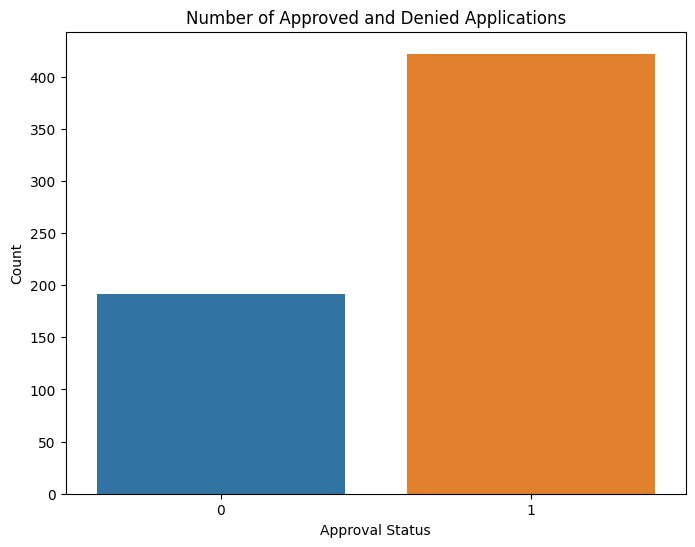

In [82]:
# How many application were approved and how many were denied? Plot a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Approved', data=df)
plt.title('Number of Approved and Denied Applications')
plt.xlabel('Approval Status')
plt.ylabel('Count')
plt.show()

### Data Prep

In [83]:
# drop 'Loan_ID' variable from the data. We won't need it.
df = df.drop('Loan_ID', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    int64  
 8   Loan_Amount_Term   614 non-null    int64  
 9   Credit_History     614 non-null    int64  
 10  Property_Area      614 non-null    object 
 11  Loan_Approved      614 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 57.7+ KB


In [84]:
# Create dummy variables for all 'object' type variables except 'Loan_Status'

object_columns = df.select_dtypes(include=['object']).columns.difference(['Loan_Approved'])

print(object_columns)

df = pd.get_dummies(df, columns=object_columns)

df.info()



Index(['Dependents', 'Education', 'Gender', 'Married', 'Property_Area',
       'Self_Employed'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    int64  
 3   Loan_Amount_Term         614 non-null    int64  
 4   Credit_History           614 non-null    int64  
 5   Loan_Approved            614 non-null    int64  
 6   Dependents_0             614 non-null    uint8  
 7   Dependents_1             614 non-null    uint8  
 8   Dependents_2             614 non-null    uint8  
 9   Dependents_3+            614 non-null    uint8  
 10  Education_Graduate       614 non-null    uint8  
 11  Education_Not Graduate   614 non-null    uint8  
 12  Gender_Female  

In [85]:
# saving this procewssed dataset
df.to_csv('Processed_Credit_Dataset.csv', index=None)

### Data Partition

In [86]:
# Seperate the input features and target variable

X = df.drop('Loan_Approved', axis=1)  # Input features (excluding 'Loan_Approved')
y = df['Loan_Approved']  # Target variable

# Display the first few rows of the input features and target variable
print("Input Features (X):")
print(X.head())

print("\nTarget Variable (y):")
print(y.head())

Input Features (X):
   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         128               360   
1             4583             1508.0         128               360   
2             3000                0.0          66               360   
3             2583             2358.0         120               360   
4             6000                0.0         141               360   

   Credit_History  Dependents_0  Dependents_1  Dependents_2  Dependents_3+  \
0               1             1             0             0              0   
1               1             0             1             0              0   
2               1             1             0             0              0   
3               1             1             0             0              0   
4               1             1             0             0              0   

   Education_Graduate  Education_Not Graduate  Gender_Female  Gender_Male  \
0      

In [87]:
# splitting the data in training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Display the distribution of the target variable in the training set
print("\nDistribution of Target Variable in Training Set:")
print(y_train.value_counts(normalize=True))

# Display the distribution of the target variable in the testing set
print("\nDistribution of Target Variable in Testing Set:")
print(y_test.value_counts(normalize=True))

X_train.head()


Distribution of Target Variable in Training Set:
1    0.696538
0    0.303462
Name: Loan_Approved, dtype: float64

Distribution of Target Variable in Testing Set:
1    0.650407
0    0.349593
Name: Loan_Approved, dtype: float64


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Gender_Female,Gender_Male,Married_No,Married_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_No,Self_Employed_Yes
83,6000,2250.0,265,360,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0
90,2958,2900.0,131,360,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0
227,6250,1695.0,210,360,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0
482,2083,3150.0,128,360,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0
464,4166,0.0,98,360,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0


# **Models**

## <font color='chocolate'>**1. Logistic Regression**</font>

In [89]:
# Import Logistic Regression Model
from sklearn.linear_model import LogisticRegression

In [90]:
# Fit the model on the data
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
print("Logistic Regression model has been fitted on the training data.")

Logistic Regression model has been fitted on the training data.


In [91]:
# From sklearn.metrics import accuracy_score and confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

# Predict the loan eligibility on testing set and calculate its accuracy.


# Predict the loan eligibility on the testing set
y_pred = logistic_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")


Accuracy: 0.79

Confusion Matrix:
[[18 25]
 [ 1 79]]


In [92]:
# Print the confusion matrix
print(conf_matrix)

[[18 25]
 [ 1 79]]


In [93]:
# check how probabilities are assigned
# Predict probabilities on the testing set
probabilities = logistic_model.predict_proba(X_test)

# Display the first few predicted probabilities
print("Probabilities for the first few samples:")
print(probabilities[:5])

Probabilities for the first few samples:
[[0.09538613 0.90461387]
 [0.07911699 0.92088301]
 [0.21407295 0.78592705]
 [0.24718289 0.75281711]
 [0.11207405 0.88792595]]


In [94]:
# to change the default threshold and to make it 70% and above
#(pypred[:, 1] >= 0.7).astype(int)

NameError: ignored

## <font color='chocolate'>**2. Random Forest**

In [20]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [21]:
# Let's list the tunable hyperparameters for Random Forest algorithm


For random forests,

* The first hyperparameter to tune is n_estimators. We will try 100 and 200.

* The second one is max_features. Let's try - 'auto', 'sqrt', and 0.33.

* The third one is min_samples_leaf. Let's try - 1, 3, 5, 10

In [22]:
# Fit a Random Forest Classifier
